In [1]:
import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect('Ebay_tech_Analysis.db')
query = pd.read_sql_query('''SELECT * FROM EbayNewData_2''',conn)
query.to_csv(r'C:\Users\Admin\Desktop\data analysis\ebay_dataNew1.csv',index=False)
path='C:/Users/Admin/Desktop/data analysis/ebay_dataNew1.csv'
df= pd.read_csv(path)

In [3]:
#Dropping nan values
df.dropna(inplace=True)

In [4]:
#reseting index value after removing nan
df.reset_index(drop=True,inplace=True)

In [5]:
#Dropping duplicates
df.drop_duplicates(inplace=True)

In [6]:
df.head(5)

,Model,Brand,Processor,ModelNumber,OperatingSystem,RAM,Price
0,Apple iPhone 6s,Apple,Dual Core,A1633 (CDMA + GSM),iOS,2 GB,76.00
1,Apple iPhone 11 Pro Max,Apple,Hexa Core,A2160 (CDMA + GSM) A2161 (CDMA + GSM),iOS,4 GB,434.99
2,Apple iPhone XS XSMax,Apple,Hexa Core,A1920 A1921(CDMA + GSM),iOS,4GB,234.99
3,Apple iPhone XR,Apple,Hexa Core,A1984 (CDMA + GSM),iOS,3 GB,224.99
4,Apple iPhone 4s,Apple,Dual Core,A1387 (CDMA + GSM),iOS,32GB,54.00


In [7]:
#renaming columns
df.rename(columns={'Model':"Model's",'Brand':"Brand's"},inplace=True)

In [8]:
#data types
df.dtypes

Model's             object
Brand's             object
Processor           object
ModelNumber         object
OperatingSystem     object
RAM                 object
Price              float64
dtype: object

In [9]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 46
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model's          44 non-null     object 
 1   Brand's          44 non-null     object 
 2   Processor        44 non-null     object 
 3   ModelNumber      44 non-null     object 
 4   OperatingSystem  44 non-null     object 
 5   RAM              44 non-null     object 
 6   Price            44 non-null     float64
dtypes: float64(1), object(6)
memory usage: 2.8+ KB


In [10]:
#Calculating mean,count,max,min,etc by describe func
df.describe()

,Price
count,44.000000
mean,289.416136
std,272.667242
min,54.000000
25%,158.000000
50%,210.525000
75%,304.247500
max,1479.990000


In [11]:
#How many columns and row are there
df.shape

(44, 7)

In [12]:
#Top 5 highest prices among all
df['Price'].nlargest(n=5)

19    1479.99
23    1269.99
14     625.00
11     564.98
13     557.49
Name: Price, dtype: float64

In [13]:
#Highest Price mobile specification
for i in range(len(df)):
    try:
        if df['Price'][i]==df['Price'].max():
            print(df["Model's"][i],df['Processor'][i],df['OperatingSystem'][i],df['RAM'][i],df['ModelNumber'][i])
    except KeyError:
        continue

Find N Octa Core Android 12 GB PEUM00


In [14]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, "Comparison between Model's with Price")

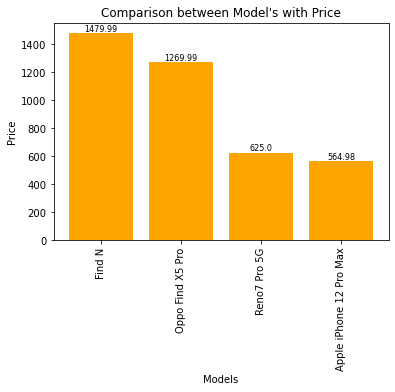

In [15]:
#Plotting Top 4 phones with highest price
a=df.nlargest(n=4,columns=['Price'])
a.reset_index(drop=True,inplace=True)
X=a["Model's"]
Y=a['Price']
for i in range(len(X)):
       plt.text(X[i],Y[i],Y[i],ha='center',fontsize=8,va='bottom')
plt.bar(X,Y,color='orange')
plt.xlabel('Models')
plt.ylabel('Price')
plt.xticks(rotation='vertical')
plt.title("Comparison between Model's with Price")

In [16]:
#Find N of Oppo has highest price among all brand phones

In [17]:
import numpy as np

In [18]:
x=np.array([a['Price'][0],a['Price'][1],a['Price'][2],a['Price'][3]])

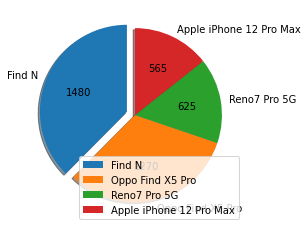

In [19]:
mylabels = [a["Model's"][0], a["Model's"][1], a["Model's"][2], a["Model's"][3]]
explode=[0.1,0,0,0]
total = sum(x)
plt.pie(x,labels=mylabels,explode= explode,startangle=90,shadow=True,autopct=lambda p: '{:.0f}'.format(p * total / 100))
plt.legend(loc='lower right')

Text(0.5, 1.0, "Comparison between RAM's with price")

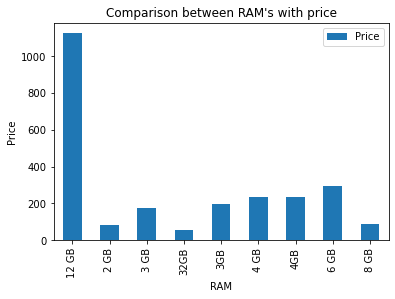

In [20]:
ax=df.pivot_table(index='RAM').plot(kind='bar')
ax.set_xlabel("RAM")
ax.set_ylabel("Price")
ax.set_title("Comparison between RAM's with price")

In [21]:
#12Gb ram has highest price compared to all other ram's.As u can see 6gb ram has higher price than 8 gb ram.
#Lowest price is of ram 2gb

Text(0.5, 1.0, 'Comparison between brands with price')

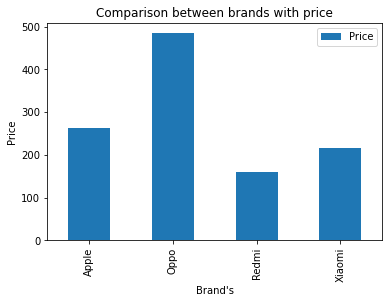

In [22]:
ax=df.pivot_table(index="Brand's").plot(kind='bar')
ax.set_xlabel("Brand's")
ax.set_ylabel("Price")
ax.set_title("Comparison between brands with price")

In [23]:
#Brand of oppo is higher in price among all other mobiles.

In [24]:
#Converting categorical to numerical data
df_model=pd.get_dummies(df["Model's"])

In [25]:
#Converting categorical to numerical data
df_brand=pd.get_dummies(df["Brand's"])

In [26]:
#Converting categorical to numerical data
df_processor=pd.get_dummies(df["Processor"])

In [27]:
#Converting categorical to numerical data
df_modelnumber=pd.get_dummies(df["ModelNumber"])

In [28]:
#Converting categorical to numerical data
df_os=pd.get_dummies(df["OperatingSystem"])

In [29]:
#Converting categorical to numerical data
df_ram=pd.get_dummies(df["RAM"])

In [30]:
#Concatinating and making new data frame
df_new=pd.concat([df_model,df_brand,df_processor,df_modelnumber,df_os,df_ram,df['Price']],axis=1)

In [31]:
#Here X will take all columns except last columns and Y will Take last column
X=df_new.iloc[:,0:-1]
Y=df_new.iloc[:, -1]

In [32]:
Y.shape

(44,)

In [33]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [34]:
lm.fit(X,Y)

LinearRegression()

In [35]:
#Here we predicted price of mobile phones
lm.predict(X)

array([  75.98547363,  434.9432373 ,  234.92883301,  237.57043457,
         54.00109863,  344.96496582,   89.98547363,  414.95227051,
        159.95422363,  139.42297363,  237.57043457,  564.91027832,
        139.42297363,  557.42102051,  624.93933105,  324.96594238,
        249.98474121,  298.98742676, 1480.02160645,  349.93469238,
        279.98937988, 1269.99914551,  298.95910645,  250.01281738,
        191.86437988,  194.9552002 ,   88.60461426,  184.95568848,
        199.95080566,  118.84338379,  135.99621582,  121.97180176,
        236.56799316,  320.02062988,  208.12805176,  158.09289551,
        158.06066895,  145.10559082,  213.08117676,  118.92687988,
        289.03430176,  198.66027832,  169.04992676,  168.62121582])

In [36]:
#Accuracy_score
print(lm.score(X,Y)*100)

99.9357678935841


In [37]:
# Round of Accuracy score
print(round(lm.score(X,Y)*100),"%")

100 %


In [38]:
#In Ebay tech data analyis we observed that company oppo has highest price among all phones.Highest ram is upto 12gb.Lowest ram
#is upto 2gb.We have also see various graph related to dataset.At last we predicted the price of mobile phone using linear
#regression technique.We also get accuracy almost 100% only if we round off